# Нейронная сеть последовательной модели для классификации на примере MNIST

In [35]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.utils import np_utils

Загрузка датасета

In [36]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [37]:
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

Создание сети через Sequential

In [38]:
model_seq = keras.Sequential(
    [
        layers.Input(shape=(784,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')        
    ]
)

In [39]:
model_seq.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


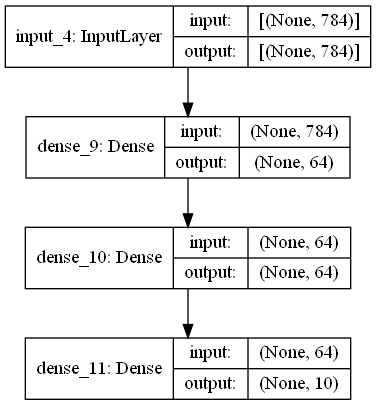

In [40]:
keras.utils.plot_model(model_seq, "model.png", show_shapes=True)

## Обучение и тест

In [41]:
model_seq.compile(
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=['accuracy']
)

In [42]:
history = model_seq.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)
test_scores = model_seq.evaluate(x_test, y_test, verbose=2)

print('Test loss: ', test_scores[0])
print('Test accuracy', test_scores[1])

Epoch 1/2


C:\python\lib\site-packages\keras\backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


750/750 [==============================] - 2s 2ms/step - loss: 0.3623 - accuracy: 0.8967 - val_loss: 0.1871 - val_accuracy: 0.9448
Epoch 2/2
750/750 [==============================] - 1s 1ms/step - loss: 0.1653 - accuracy: 0.9515 - val_loss: 0.1409 - val_accuracy: 0.9578
313/313 - 0s - loss: 0.1363 - accuracy: 0.9581
Test loss:  0.1362750232219696
Test accuracy 0.9581000208854675


## Модель через функциональное API

In [43]:
inputs = keras.Input(shape=(784,))

dense = layers.Dense(64, activation="relu")
x = dense(inputs)

x = layers.Dense(64, activation="relu")(x)

outputs = layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

model.compile(
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=['accuracy']
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
750/750 [==============================] - 1s 2ms/step - loss: 0.3498 - accuracy: 0.9005 - val_loss: 0.1974 - val_accuracy: 0.9382
Epoch 2/2
750/750 [==============================] - 1s 1ms/step - loss: 0.1652 - accuracy: 0.9514 - val_loss: 0.1645 - val_accuracy: 0.9505
313/313 - 0s - loss: 0.1639 - accuracy: 0.9504
Test loss: 0.16385160386562347
Test accuracy: 0.9503999948501587


In [44]:
x_test.shape, x_test[0].shape

((10000, 784), (784,))

In [45]:
model.predict(x_test[0].reshape((1, 784)))

array([[ -1.7769648,  -7.981556 ,   1.3342183,   0.7447733,  -4.2466445,
         -3.293407 , -10.286311 ,   9.728065 ,  -2.4778438,  -1.1292233]],
      dtype=float32)

In [48]:
tf.argmax(model.predict(x_test[0].reshape((1, 784)))[0]), y_test[0]

(<tf.Tensor: shape=(), dtype=int64, numpy=7>,
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32))

In [50]:
model.predict(x_test[0].reshape((1, 784))).argmax(axis=-1)

array([7], dtype=int64)